In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Colour Scheme
COLOUR_YES = '#E69F00' #light orange like ggplot2 orange in R
COLOUR_NO = '#56B4E9' #Light blue like ggplot2 blue in R Colours are supposed to be colour blind friendly

#Main CSV File the Drug Data 
#Source -> https://www.washingtonpost.com/investigations/interactive/2023/opioid-epidemic-pain-pills-sold-oxycodone-hydrocodone/
df = pd.read_csv('arcos-ky-statewide-itemized.csv')



C:\Users\I544996\AppData\Local\Temp\ipykernel_10108\4058132144.py:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('arcos-ky-statewide-itemized.csv')


Explore contents of CSV File

In [36]:
len(df)

7222079

In [37]:
df.head()

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,MME_Conversion_Factor,Dosage_Strength,TRANSACTION_DATE,Combined_Labeler_Name,Reporter_family,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,MME,BUYER_STATE,BUYER_COUNTY
0,PR0095794,DISTRIBUTOR,RICHIE PHARMACAL CO INC,NaN,119 STATE AVE,NaN,GLASGOW,KY,42141,BARREN,...,1.0,10.0,2006-03-28,Actavis,Richie Pharmacal,36.32400,6000.0,36324.00,KY,JEFFERSON
1,PR0095794,DISTRIBUTOR,RICHIE PHARMACAL CO INC,NaN,119 STATE AVE,NaN,GLASGOW,KY,42141,BARREN,...,1.0,10.0,2006-03-08,Actavis,Richie Pharmacal,6.05400,1000.0,6054.00,KY,JEFFERSON
2,PR0205559,DISTRIBUTOR,"CVS TN DISTRIBUTION, LLC",NaN,10017 KINGSTON PIKE,NaN,KNOXVILLE,TN,37922,KNOX,...,1.0,5.0,2006-12-19,SpecGx LLC,CVS,3.02700,1000.0,3027.00,KY,JEFFERSON
3,PR0205559,DISTRIBUTOR,"CVS TN DISTRIBUTION, LLC",NaN,10017 KINGSTON PIKE,NaN,KNOXVILLE,TN,37922,KNOX,...,1.0,7.5,2006-12-19,SpecGx LLC,CVS,2.27025,500.0,2270.25,KY,JEFFERSON
4,PR0205559,DISTRIBUTOR,"CVS TN DISTRIBUTION, LLC",NaN,10017 KINGSTON PIKE,NaN,KNOXVILLE,TN,37922,KNOX,...,1.0,7.5,2007-01-23,SpecGx LLC,CVS,11.35125,2500.0,11351.25,KY,JEFFERSON


In [38]:
df.columns

Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_ZIP',
       'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO', 'DRUG_NAME', 'Measure',
       'MME_Conversion_Factor', 'Dosage_Strength', 'TRANSACTION_DATE',
       'Combined_Labeler_Name', 'Reporter_family', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'MME', 'BUYER_STATE', 'BUYER_COUNTY'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7222079 entries, 0 to 7222078
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   REPORTER_DEA_NO        object 
 1   REPORTER_BUS_ACT       object 
 2   REPORTER_NAME          object 
 3   REPORTER_ADDL_CO_INFO  object 
 4   REPORTER_ADDRESS1      object 
 5   REPORTER_ADDRESS2      object 
 6   REPORTER_CITY          object 
 7   REPORTER_STATE         object 
 8   REPORTER_ZIP           int64  
 9   REPORTER_COUNTY        object 
 10  BUYER_DEA_NO           object 
 11  BUYER_BUS_ACT          object 
 12  BUYER_NAME             object 
 13  BUYER_ADDL_CO_INFO     object 
 14  BUYER_ADDRESS1         object 
 15  BUYER_ADDRESS2         object 
 16  BUYER_CITY             object 
 17  BUYER_ZIP              int64  
 18  TRANSACTION_CODE       object 
 19  DRUG_CODE              int64  
 20  NDC_NO                 object 
 21  DRUG_NAME              object 
 22  Measure           

I will use Buyer_County as my count variable
I also want to know my date ranges

In [40]:
min_date =df['TRANSACTION_DATE'].min()
max_date = df['TRANSACTION_DATE'].max()

print("Start Date: " + min_date+ " End Date: " + max_date)

Start Date: 2006-01-02 End Date: 2019-12-31


In [41]:
buyerCountyCounts = df['BUYER_COUNTY'].value_counts()
print(buyerCountyCounts)

BUYER_COUNTY
JEFFERSON    1098252
FAYETTE       356431
KENTON        250831
BOONE         210722
PIKE          184182
              ...   
ELLIOTT         6775
HICKMAN         6277
BRACKEN         6060
TRIMBLE         5308
HANCOCK         4971
Name: count, Length: 119, dtype: int64


I want to take US population data from 2006 ->2019

• I will take US Government population estimates and actual census info from "2019: PEP Population Estimates" and "County Intercensal Datasets: 2000-2010"
• My idea is to build a visualisation of pain pills by capita on a county level, I want to look at either doing a chloropath map or a barchart animated to show changes over the time frame on a yearly or month to month basis depending on data
• I also want to experiment with other data sources, maybe either Republican vs Democrat voting here or Rural bs Urban, or primary vs teritiary sectors

In [13]:
# df_pop_2000 = pd.read_csv('uspopulation2000-2010.csv')

Cleaning process for pop file 2000-2010: I got error UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 211963: invalid continuation byte

By examing this position in notepad++ i was able to see not utf-8 character however this line is for new mexico so i am not interested in this for my analysis. So I am simply removing line in question 50,4,8,35,13,New Mexico,Do??na County,174880,175098,176496,178464,182045,184939,189199,193701,197853,200855,205401,209233,210538

In [42]:
df_pop_2000 = pd.read_csv('uspopulation2000-2010V2.csv')
df_pop_2000.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2000,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2010
0,40,3,6,1,0,Alabama,Alabama,4447207,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938,4779736,4785298
1,50,3,6,1,1,Alabama,Autauga County,43751,44021,44889,45909,46800,48366,49676,51328,52405,53277,54135,54571,54632
2,50,3,6,1,3,Alabama,Baldwin County,140416,141342,144875,147957,151509,156266,162183,168121,172404,175827,179406,182265,183195
3,50,3,6,1,5,Alabama,Barbour County,29042,29015,28863,28653,28594,28287,28027,27861,27757,27808,27657,27457,27411
4,50,3,6,1,7,Alabama,Bibb County,19856,19913,21028,21199,21399,21721,22042,22099,22438,22705,22941,22915,22867


In [43]:
df_pop_2010 = pd.read_csv('usPopulations2010-2019.csv')
df_pop_2010.head()

,Geographic Area Name (Grouping),4/1/2010 Census population!!Population,4/1/2010 population estimates base!!Population,7/1/2010 population estimate!!Population,7/1/2011 population estimate!!Population,7/1/2012 population estimate!!Population,7/1/2013 population estimate!!Population,7/1/2014 population estimate!!Population,7/1/2015 population estimate!!Population,7/1/2016 population estimate!!Population,7/1/2017 population estimate!!Population,7/1/2018 population estimate!!Population,7/1/2019 population estimate!!Population
0,Kentucky,"4,339,367","4,339,333","4,348,181","4,369,821","4,386,346","4,404,659","4,414,349","4,425,976","4,438,182","4,452,268","4,461,153","4,467,673"
1,"Autauga County, Alabama","54,571","54,597","54,773","55,227","54,954","54,727","54,893","54,864","55,243","55,390","55,533","55,869"
2,"Baldwin County, Alabama","182,265","182,265","183,112","186,558","190,145","194,885","199,183","202,939","207,601","212,521","217,855","223,234"
3,"Barbour County, Alabama","27,457","27,455","27,327","27,341","27,169","26,937","26,755","26,283","25,806","25,157","24,872","24,686"
4,"Bibb County, Alabama","22,915","22,915","22,870","22,745","22,667","22,521","22,553","22,566","22,586","22,550","22,367","22,394"


No issue loading second file

Next Task: I need to prepare the data so that it is in the following format

1. Only for Kentucky Counties
2. Each Year Bucket is in same format
3. Clean county names so they match
4. Join both datasets on County Names

Once done, I need to do create another dataframe using painpill dataset where I
1. Aggregate by drug usage grouped by county
2. Clean county names to match population data set
3. Join on county name

In [44]:
# Filter rows where "StateName" is "Kentucky"
kentucky_df_pop_2000 = df_pop_2000[df_pop_2000['STNAME'] == 'Kentucky']

#check 5 rows.
# kentucky_df_pop_2000.head()

In [46]:
# Step 1: Convert text to uppercase
kentucky_df_pop_2000['CTYNAME'] = kentucky_df_pop_2000['CTYNAME'].str.upper()

# Step 2: Remove "COUNTY" from each row
kentucky_df_pop_2000['CTYNAME'] = kentucky_df_pop_2000['CTYNAME'].str.replace('COUNTY', '').str.strip()

kentucky_df_pop_2000.head()

C:\Users\I544996\AppData\Local\Temp\ipykernel_16756\2439570171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kentucky_df_pop_2000['CTYNAME'] = kentucky_df_pop_2000['CTYNAME'].str.upper()
C:\Users\I544996\AppData\Local\Temp\ipykernel_16756\2439570171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kentucky_df_pop_2000['CTYNAME'] = kentucky_df_pop_2000['CTYNAME'].str.replace('COUNTY', '').str.strip()


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2000,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2010
1010,40,3,6,21,0,Kentucky,KENTUCKY,4042193,4049021,4068132,4089875,4117170,4146101,4182742,4219239,4256672,4289878,4317074,4339367,4346266
1011,50,3,6,21,1,Kentucky,ADAIR,17275,17327,17584,17762,17924,17994,18128,18335,18493,18541,18729,18656,18614
1012,50,3,6,21,3,Kentucky,ALLEN,17792,17820,17947,18219,18434,18699,18910,19272,19540,19838,19811,19956,19980
1013,50,3,6,21,5,Kentucky,ANDERSON,19093,19151,19382,19315,19504,19714,19987,20519,20999,21088,21328,21421,21465
1014,50,3,6,21,7,Kentucky,BALLARD,8293,8304,8225,8164,8254,8242,8269,8204,8190,8265,8204,8249,8263


In [47]:
# Step 1: Convert text to uppercase 2010-2019
df_pop_2010['Geographic Area Name (Grouping)'] = df_pop_2010['Geographic Area Name (Grouping)'].str.upper()
df_pop_2010.head()

,Geographic Area Name (Grouping),4/1/2010 Census population!!Population,4/1/2010 population estimates base!!Population,7/1/2010 population estimate!!Population,7/1/2011 population estimate!!Population,7/1/2012 population estimate!!Population,7/1/2013 population estimate!!Population,7/1/2014 population estimate!!Population,7/1/2015 population estimate!!Population,7/1/2016 population estimate!!Population,7/1/2017 population estimate!!Population,7/1/2018 population estimate!!Population,7/1/2019 population estimate!!Population
0,KENTUCKY,"4,339,367","4,339,333","4,348,181","4,369,821","4,386,346","4,404,659","4,414,349","4,425,976","4,438,182","4,452,268","4,461,153","4,467,673"
1,"AUTAUGA COUNTY, ALABAMA","54,571","54,597","54,773","55,227","54,954","54,727","54,893","54,864","55,243","55,390","55,533","55,869"
2,"BALDWIN COUNTY, ALABAMA","182,265","182,265","183,112","186,558","190,145","194,885","199,183","202,939","207,601","212,521","217,855","223,234"
3,"BARBOUR COUNTY, ALABAMA","27,457","27,455","27,327","27,341","27,169","26,937","26,755","26,283","25,806","25,157","24,872","24,686"
4,"BIBB COUNTY, ALABAMA","22,915","22,915","22,870","22,745","22,667","22,521","22,553","22,566","22,586","22,550","22,367","22,394"


In [48]:
# Filter rows where "Geographic Area Name (Grouping)" contains "KENTUCKY"
kentucky_df_pop_2010 = df_pop_2010[df_pop_2010['Geographic Area Name (Grouping)'].str.contains('KENTUCKY', case=False, na=False)]

# Display the subset DataFrame
kentucky_df_pop_2010.head()

,Geographic Area Name (Grouping),4/1/2010 Census population!!Population,4/1/2010 population estimates base!!Population,7/1/2010 population estimate!!Population,7/1/2011 population estimate!!Population,7/1/2012 population estimate!!Population,7/1/2013 population estimate!!Population,7/1/2014 population estimate!!Population,7/1/2015 population estimate!!Population,7/1/2016 population estimate!!Population,7/1/2017 population estimate!!Population,7/1/2018 population estimate!!Population,7/1/2019 population estimate!!Population
0,KENTUCKY,"4,339,367","4,339,333","4,348,181","4,369,821","4,386,346","4,404,659","4,414,349","4,425,976","4,438,182","4,452,268","4,461,153","4,467,673"
994,"ADAIR COUNTY, KENTUCKY","18,656","18,659","18,757","18,987","18,934","19,124","19,262","19,162","19,259","19,287","19,199","19,202"
995,"ALLEN COUNTY, KENTUCKY","19,956","19,958","20,037","20,176","20,232","20,316","20,493","20,660","20,721","20,903","21,122","21,315"
996,"ANDERSON COUNTY, KENTUCKY","21,421","21,462","21,470","21,564","21,694","21,747","21,868","21,920","22,191","22,545","22,641","22,747"
997,"BALLARD COUNTY, KENTUCKY","8,249","8,246","8,260","8,269","8,285","8,252","8,188","8,216","8,046","8,018","7,992","7,888"


In [49]:
#Remove the 0th row because this is total data for the whole state
kentucky_df_pop_2010 = kentucky_df_pop_2010.drop(0)

# Reset the index after dropping the row
kentucky_df_pop_2010.reset_index(drop=True, inplace=True)
#Change column name to CITYNAME to match other df
kentucky_df_pop_2010=kentucky_df_pop_2010.rename(columns={'Geographic Area Name (Grouping)': 'CTYNAME'})
#Strip out KENTUCKY & COUNTY
kentucky_df_pop_2010['CTYNAME'] = kentucky_df_pop_2010['CTYNAME'].str.replace(r'(KENTUCKY|COUNTY|,)', '', regex=True)

# Display the modified DataFrame
kentucky_df_pop_2010.head()

,CTYNAME,4/1/2010 Census population!!Population,4/1/2010 population estimates base!!Population,7/1/2010 population estimate!!Population,7/1/2011 population estimate!!Population,7/1/2012 population estimate!!Population,7/1/2013 population estimate!!Population,7/1/2014 population estimate!!Population,7/1/2015 population estimate!!Population,7/1/2016 population estimate!!Population,7/1/2017 population estimate!!Population,7/1/2018 population estimate!!Population,7/1/2019 population estimate!!Population
0,ADAIR,"18,656","18,659","18,757","18,987","18,934","19,124","19,262","19,162","19,259","19,287","19,199","19,202"
1,ALLEN,"19,956","19,958","20,037","20,176","20,232","20,316","20,493","20,660","20,721","20,903","21,122","21,315"
2,ANDERSON,"21,421","21,462","21,470","21,564","21,694","21,747","21,868","21,920","22,191","22,545","22,641","22,747"
3,BALLARD,"8,249","8,246","8,260","8,269","8,285","8,252","8,188","8,216","8,046","8,018","7,992","7,888"
4,BARREN,"42,173","42,161","42,116","42,321","42,607","42,937","43,034","43,546","43,763","43,746","44,115","44,249"


In [50]:
kentucky_df_pop_2000['CTYNAME'] = kentucky_df_pop_2000['CTYNAME'].str.strip()
kentucky_df_pop_2010['CTYNAME'] = kentucky_df_pop_2010['CTYNAME'].str.strip()

# Join the DataFrames on the "CTYNAME" column
kentuckypop2000_2019_df = kentucky_df_pop_2010.merge(kentucky_df_pop_2000, on='CTYNAME', how='inner')
kentuckypop2000_2019_df.head()

C:\Users\I544996\AppData\Local\Temp\ipykernel_16756\501120097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kentucky_df_pop_2000['CTYNAME'] = kentucky_df_pop_2000['CTYNAME'].str.strip()


,CTYNAME,4/1/2010 Census population!!Population,4/1/2010 population estimates base!!Population,7/1/2010 population estimate!!Population,7/1/2011 population estimate!!Population,7/1/2012 population estimate!!Population,7/1/2013 population estimate!!Population,7/1/2014 population estimate!!Population,7/1/2015 population estimate!!Population,7/1/2016 population estimate!!Population,...,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2010
0,ADAIR,"18,656","18,659","18,757","18,987","18,934","19,124","19,262","19,162","19,259",...,17762,17924,17994,18128,18335,18493,18541,18729,18656,18614
1,ALLEN,"19,956","19,958","20,037","20,176","20,232","20,316","20,493","20,660","20,721",...,18219,18434,18699,18910,19272,19540,19838,19811,19956,19980
2,ANDERSON,"21,421","21,462","21,470","21,564","21,694","21,747","21,868","21,920","22,191",...,19315,19504,19714,19987,20519,20999,21088,21328,21421,21465
3,BALLARD,"8,249","8,246","8,260","8,269","8,285","8,252","8,188","8,216","8,046",...,8164,8254,8242,8269,8204,8190,8265,8204,8249,8263
4,BARREN,"42,173","42,161","42,116","42,321","42,607","42,937","43,034","43,546","43,763",...,38704,39164,39601,40320,40857,41435,41797,42171,42173,42164


Rename my columns to make it easier to work with
Have the column headers for year stored as a number

In [51]:
column_mappings = {
    'POPESTIMATE2000' : 2000,
    'POPESTIMATE2001' : 2001,
    'POPESTIMATE2002' : 2002,
    'POPESTIMATE2003' : 2003,
    'POPESTIMATE2004' : 2004,
    'POPESTIMATE2005' : 2005,
    'POPESTIMATE2006' : 2006,
    'POPESTIMATE2007' : 2007,
    'POPESTIMATE2008' : 2008,
    'POPESTIMATE2009' : 2009,
    'CENSUS2010POP': 2010,
    '7/1/2011 population estimate!!Population': 2011,
    '7/1/2012 population estimate!!Population': 2012,
    '7/1/2013 population estimate!!Population': 2013,
    '7/1/2014 population estimate!!Population': 2014,
    '7/1/2015 population estimate!!Population': 2015,
    '7/1/2016 population estimate!!Population': 2016,
    '7/1/2017 population estimate!!Population': 2017,
    '7/1/2018 population estimate!!Population': 2018,
    '7/1/2019 population estimate!!Population': 2019,
}
# Rename the columns
kentuckypop2000_2019_df = kentuckypop2000_2019_df.rename(columns=column_mappings)
kentuckypop2000_2019_df.head()

,CTYNAME,4/1/2010 Census population!!Population,4/1/2010 population estimates base!!Population,7/1/2010 population estimate!!Population,2011,2012,2013,2014,2015,2016,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,POPESTIMATE2010
0,ADAIR,"18,656","18,659","18,757","18,987","18,934","19,124","19,262","19,162","19,259",...,17762,17924,17994,18128,18335,18493,18541,18729,18656,18614
1,ALLEN,"19,956","19,958","20,037","20,176","20,232","20,316","20,493","20,660","20,721",...,18219,18434,18699,18910,19272,19540,19838,19811,19956,19980
2,ANDERSON,"21,421","21,462","21,470","21,564","21,694","21,747","21,868","21,920","22,191",...,19315,19504,19714,19987,20519,20999,21088,21328,21421,21465
3,BALLARD,"8,249","8,246","8,260","8,269","8,285","8,252","8,188","8,216","8,046",...,8164,8254,8242,8269,8204,8190,8265,8204,8249,8263
4,BARREN,"42,173","42,161","42,116","42,321","42,607","42,937","43,034","43,546","43,763",...,38704,39164,39601,40320,40857,41435,41797,42171,42173,42164


In [52]:
kentuckypop2000_2019_df = kentuckypop2000_2019_df.drop(['4/1/2010 Census population!!Population', '4/1/2010 population estimates base!!Population','ESTIMATESBASE2000',
                                                        'POPESTIMATE2010','7/1/2010 population estimate!!Population', 'SUMLEV','REGION','DIVISION','STATE','COUNTY'], axis=1)
kentuckypop2000_2019_df.head()

,CTYNAME,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ADAIR,"18,987","18,934","19,124","19,262","19,162","19,259","19,287","19,199","19,202",...,17584,17762,17924,17994,18128,18335,18493,18541,18729,18656
1,ALLEN,"20,176","20,232","20,316","20,493","20,660","20,721","20,903","21,122","21,315",...,17947,18219,18434,18699,18910,19272,19540,19838,19811,19956
2,ANDERSON,"21,564","21,694","21,747","21,868","21,920","22,191","22,545","22,641","22,747",...,19382,19315,19504,19714,19987,20519,20999,21088,21328,21421
3,BALLARD,"8,269","8,285","8,252","8,188","8,216","8,046","8,018","7,992","7,888",...,8225,8164,8254,8242,8269,8204,8190,8265,8204,8249
4,BARREN,"42,321","42,607","42,937","43,034","43,546","43,763","43,746","44,115","44,249",...,38517,38704,39164,39601,40320,40857,41435,41797,42171,42173


In [54]:
print(kentuckypop2000_2019_df.dtypes)

CTYNAME    object
2011       object
2012       object
2013       object
2014       object
2015       object
2016       object
2017       object
2018       object
2019       object
STNAME     object
2000        int64
2001        int64
2002        int64
2003        int64
2004        int64
2005        int64
2006        int64
2007        int64
2008        int64
2009        int64
2010        int64
dtype: object


Can see from above that counts are not all same data type, some are strings some our numbers (look at the commas)

In [56]:
columns_to_convert = [year for year in range(2011, 2020)]

for column in columns_to_convert:
    # Remove commas from the values and then convert to numeric
    kentuckypop2000_2019_df[column] = pd.to_numeric(kentuckypop2000_2019_df[column].str.replace(',', ''), errors='coerce')


AttributeError: Can only use .str accessor with string values!

In [57]:
print(kentuckypop2000_2019_df.dtypes)

CTYNAME    object
2011        int64
2012        int64
2013        int64
2014        int64
2015        int64
2016        int64
2017        int64
2018        int64
2019        int64
STNAME     object
2000        int64
2001        int64
2002        int64
2003        int64
2004        int64
2005        int64
2006        int64
2007        int64
2008        int64
2009        int64
2010        int64
dtype: object


In [67]:
kentuckypop2000_2019_df

,CTYNAME,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ADAIR,18987,18934,19124,19262,19162,19259,19287,19199,19202,...,17584,17762,17924,17994,18128,18335,18493,18541,18729,18656
1,ALLEN,20176,20232,20316,20493,20660,20721,20903,21122,21315,...,17947,18219,18434,18699,18910,19272,19540,19838,19811,19956
2,ANDERSON,21564,21694,21747,21868,21920,22191,22545,22641,22747,...,19382,19315,19504,19714,19987,20519,20999,21088,21328,21421
3,BALLARD,8269,8285,8252,8188,8216,8046,8018,7992,7888,...,8225,8164,8254,8242,8269,8204,8190,8265,8204,8249
4,BARREN,42321,42607,42937,43034,43546,43763,43746,44115,44249,...,38517,38704,39164,39601,40320,40857,41435,41797,42171,42173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,WAYNE,20901,20824,20782,20618,20609,20728,20628,20430,20333,...,19949,20078,20353,20473,20516,20547,20667,20757,20793,20813
116,WEBSTER,13528,13460,13357,13184,13155,13181,13012,13051,12942,...,13945,13982,13912,13969,14004,13875,13867,13646,13681,13621
117,WHITLEY,35854,35768,35870,35833,36109,36108,36074,36101,36264,...,36091,36043,36099,36163,36253,36149,36138,36163,35994,35637
118,WOLFE,7362,7194,7279,7252,7241,7189,7248,7199,7157,...,6965,7015,7053,7076,7201,7256,7323,7294,7351,7355


In [68]:
print(kentuckypop2000_2019_df.dtypes)

CTYNAME    object
2011        int64
2012        int64
2013        int64
2014        int64
2015        int64
2016        int64
2017        int64
2018        int64
2019        int64
2000        int64
2001        int64
2002        int64
2003        int64
2004        int64
2005        int64
2006        int64
2007        int64
2008        int64
2009        int64
2010        int64
dtype: object


In [74]:
# Separate the county names from the numerical data
county_names = kentuckypop2000_2019_df['CTYNAME']
numerical_data = kentuckypop2000_2019_df.drop('CTYNAME', axis=1)

# Transpose and sort the numerical data
df_sorted = numerical_data.T.sort_index(ascending=True).T

# Add the county names back to the sorted DataFrame
df_sorted['CTYNAME'] = county_names

# Define the start year and end year for population change calculation
start_year = 2006
end_year = 2019

# Calculate population change for each county
df_sorted['PopulationChange'] = df_sorted[end_year] - df_sorted[start_year]

# Sort the DataFrame by population change in descending order
df_PopChange = df_sorted.sort_values(by='PopulationChange', ascending=False)

# Select the top 10 df_PopChange with the biggest population changes
top_10_counties = df_sorted.head(10)

# Create a bar plot to visualize the top 10 counties
fig = px.bar(top_10_counties, x='PopulationChange', y=top_10_counties.index, orientation='h',
             labels={"PopulationChange": "Population Change", "index": "County"})

# Customize the plot
fig.update_layout(
    title="Top 10 Counties with the Biggest Population Changes ({}-{})".format(start_year, end_year),
    xaxis_title="Population Change",
    yaxis_title="County",
)

# Show the plot
fig.show()

I need to Create a new dataframe from the main df so that I can merge the population dataset and the drug dataset
I need to create a column for each year with the respective counts

In [75]:
df['TRANSACTION_DATE']

0          2006-03-28
1          2006-03-08
2          2006-12-19
3          2006-12-19
4          2007-01-23
              ...    
7222074    2019-08-01
7222075    2019-08-02
7222076    2019-08-09
7222077    2019-08-15
7222078    2019-08-23
Name: TRANSACTION_DATE, Length: 7222079, dtype: object

In [76]:
# df['year'] = df['TRANSACTION_DATE'].dt.year causes problem because not datetim

AttributeError: Can only use .dt accessor with datetimelike values

In [79]:
df['TRANSACTION_DATE'] = pd.to_datetime(df['TRANSACTION_DATE'])
# Get just the year and create a new column
df['year'] = df['TRANSACTION_DATE'].dt.year
# Group by BUYER_COUNTY and year and count the transactions
grouped = df.groupby(['BUYER_COUNTY', 'year']).size().reset_index(name='Transaction_Count')
grouped

,BUYER_COUNTY,year,Transaction_Count
0,ADAIR,2006,1611
1,ADAIR,2007,1804
2,ADAIR,2008,2132
3,ADAIR,2009,2326
4,ADAIR,2010,2702
...,...,...,...
1661,WOODFORD,2015,1459
1662,WOODFORD,2016,1493
1663,WOODFORD,2017,1246
1664,WOODFORD,2018,1378


In [81]:
drugByYear_dF = grouped.pivot(index='BUYER_COUNTY', columns='year', values='Transaction_Count')
# Fill missing values (if any) with 0
drugByYear_dF = drugByYear_dF.fillna(0)
drugByYear_dF.head()

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
BUYER_COUNTY,,,,,,,,,,,,,,
ADAIR,1611,1804,2132,2326,2702,3137,3033,2955,2178,1869,1949,2211,2058,1944
ALLEN,1374,1381,1663,1544,1547,1637,1613,1640,1363,1280,1489,1267,1054,987
ANDERSON,2433,2925,3035,3081,3098,3454,3106,2481,1724,1537,2000,2000,1755,1747
BALLARD,673,712,676,855,918,898,758,593,494,479,527,436,399,448
BARREN,5614,6331,6537,6864,7890,9044,9154,9072,6039,6031,7250,6924,6474,6100


In [88]:
kentuckypop2000_2019_df2 = kentuckypop2000_2019_df.drop([2000,2001,2002,2003,2004,2005],axis=1)
# Check the available columns in new_df and kentuckypop2000_2019_df2
print("Columns in new_df:", drugByYear_dF.columns)
print("Columns in kentuckypop2000_2019_df2:", kentuckypop2000_2019_df2.columns)

Columns in new_df: Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019],
      dtype='int32', name='year')
Columns in kentuckypop2000_2019_df2: Index(['CTYNAME',      2011,      2012,      2013,      2014,      2015,
            2016,      2017,      2018,      2019,      2006,      2007,
            2008,      2009,      2010],
      dtype='object')


In [93]:


# Set 'CTYNAME' as the index and convert to uppercase
kentuckypop2000_2019_df2.set_index('CTYNAME', inplace=True)
kentuckypop2000_2019_df2.index = kentuckypop2000_2019_df2.index.str.upper()
years_of_interest = range(2006, 2020)

# Create an empty DataFrame to store the per capita rates for the selected years
per_capita_df = pd.DataFrame()

# Loop through each year of interest
for year in years_of_interest:
    # Calculate the per capita transaction rate for the current year
    per_capita_rate = drugByYear_dF[year] / kentuckypop2000_2019_df2[year]

    # Add the per capita rates for the current year to the per_capita_df DataFrame
    per_capita_df[year] = per_capita_rate

# Now, per_capita_df contains the per capita transaction rates for every county from 2016 to 2019
per_capita_df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ADAIR,0.087865,0.097550,0.114988,0.124192,0.144833,0.165218,0.160188,0.154518,0.113072,0.097537,0.101199,0.114637,0.107193,0.101239
ALLEN,0.071295,0.070676,0.083829,0.077936,0.077521,0.081136,0.079725,0.080725,0.066511,0.061955,0.071859,0.060613,0.049901,0.046305
ANDERSON,0.118573,0.139292,0.143921,0.144458,0.144624,0.160174,0.143173,0.114085,0.078837,0.070119,0.090127,0.088711,0.077514,0.076801
BALLARD,0.082033,0.086935,0.081791,0.104217,0.111286,0.108598,0.091491,0.071861,0.060332,0.058301,0.065498,0.054378,0.049925,0.056795
BARREN,0.137406,0.152794,0.156399,0.162766,0.187087,0.213700,0.214847,0.211286,0.140331,0.138497,0.165665,0.158277,0.146753,0.137856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WAYNE,0.133207,0.143949,0.134075,0.139326,0.142603,0.167839,0.177151,0.173227,0.125182,0.110000,0.125048,0.128030,0.107636,0.115133
WEBSTER,0.086703,0.101103,0.105819,0.109714,0.121724,0.143628,0.151486,0.152429,0.120828,0.101178,0.101737,0.107670,0.091028,0.071164
WHITLEY,0.289413,0.319387,0.336200,0.374757,0.420322,0.445278,0.479395,0.454335,0.328329,0.253122,0.230309,0.233825,0.222709,0.209271
WOLFE,0.119763,0.156220,0.159857,0.118623,0.150646,0.177126,0.227134,0.224344,0.272477,0.220412,0.155933,0.122655,0.124184,0.119324


In [94]:
average_per_capita_rates = per_capita_df[years_of_interest].mean(axis=1)

# Sort counties by their average per capita rate and select the top 10
top_10_counties = average_per_capita_rates.nlargest(10)

# Display the top 10 counties with the highest average per capita rates
print(top_10_counties)

WHITLEY       0.328332
FLOYD         0.276562
PERRY         0.266365
BELL          0.252125
CLAY          0.233094
FULTON        0.227008
BREATHITT     0.224105
ROCKCASTLE    0.219889
GRANT         0.216076
PIKE          0.207100
dtype: float64


Get whether County Has Coalmine,
From Research two major CoalFields in kentucky eastern and western, 
Scrape from wikipedia using pandas"https://en.wikipedia.org/wiki/Coal_mining_in_Kentucky"

In [97]:
!pip3 install lxml

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 435.7 kB/s eta 0:00:09
    --------------------------------------- 0.1/3.8 MB 744.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/3.8 MB 1.3 MB/s eta 0:00:03
   ---- ----------------------------------- 0.4/3.8 MB 1.9 MB/s eta 0:00:02
   ------ --------------------------------- 0.6/3.8 MB 2.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.8/3.8 MB 2.6 MB/s eta 0:00:02
   ---------- ----------------------------- 1.0/3.8 MB 2.8 MB/s eta 0:00:02
   ------------ --------------------------- 1.1/3.8 MB 2.8 MB/s eta 0:00:01
   -------------- ------------------------- 1.4/3.8 MB 3.0 MB/s eta 0:00:01
   ----------------- ---------------------- 1.7/3.8 MB 3.2 MB/s eta 0:00:01
   ------------------ -------

In [99]:
url="https://en.wikipedia.org/wiki/Coal_mining_in_Kentucky"
table_class="wikitable sortable jquery-tablesorter"

In [100]:
westCoalMines = pd.read_html(url)[0]
eastCoalMine = pd.read_html(url)[1]

In [101]:
print(westCoalMines.head())
print(eastCoalMine.head())

          County[8]  Millions of tons of coal extracted  \
0     Butler County                               30.20   
1    Daviess County                               62.33   
2  Henderson County                               76.12   
3    Hopkins County                              781.80   
4     McLean County                               19.73   

   Millions of tons of coal remaining  
0                              353.29  
1                             1205.66  
2                             6700.53  
3                             7251.20  
4                             3536.95  
          County[8]  Millions of tons of coal extracted  \
0       Bell County                              302.69   
1       Boyd County                               19.93   
2  Breathitt County                              208.47   
3     Carter County                               18.61   
4       Clay County                               61.87   

   Millions of tons of coal remaining  
0         

In [103]:
coalDF = pd.concat([eastCoalMine, westCoalMines])
len(coalDF)
#resusing striping code from earlier
# Step 1: Convert text to uppercase
coalDF['County[8]'] = coalDF['County[8]'].str.upper()

# Step 2: Remove "COUNTY" from each row
coalDF['County[8]'] = coalDF['County[8]'].str.replace('COUNTY', '').str.strip()

In [104]:
coalDF.head()

,County[8],Millions of tons of coal extracted,Millions of tons of coal remaining
0,BELL,302.69,2589.32
1,BOYD,19.93,590.82
2,BREATHITT,208.47,3695.26
3,CARTER,18.61,464.74
4,CLAY,61.87,1412.37


In [107]:
county_set = set(coalDF['County[8]'])

# Then, use the apply function to check if each row in DF1 has a county value in DF2
per_capita_df['hasCoalMine'] = per_capita_df.index.to_series().apply(lambda x: 'Yes' if x in county_set else 'No')
per_capita_df.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,hasCoalMine
ADAIR,0.087865,0.097550,0.114988,0.124192,0.144833,0.165218,0.160188,0.154518,0.113072,0.097537,0.101199,0.114637,0.107193,0.101239,No
ALLEN,0.071295,0.070676,0.083829,0.077936,0.077521,0.081136,0.079725,0.080725,0.066511,0.061955,0.071859,0.060613,0.049901,0.046305,No
ANDERSON,0.118573,0.139292,0.143921,0.144458,0.144624,0.160174,0.143173,0.114085,0.078837,0.070119,0.090127,0.088711,0.077514,0.076801,No
BALLARD,0.082033,0.086935,0.081791,0.104217,0.111286,0.108598,0.091491,0.071861,0.060332,0.058301,0.065498,0.054378,0.049925,0.056795,No
BARREN,0.137406,0.152794,0.156399,0.162766,0.187087,0.213700,0.214847,0.211286,0.140331,0.138497,0.165665,0.158277,0.146753,0.137856,No


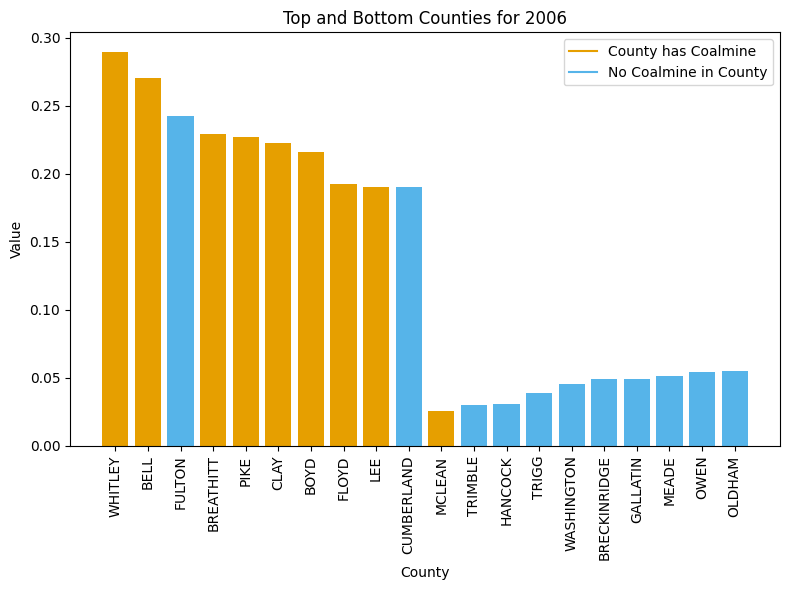

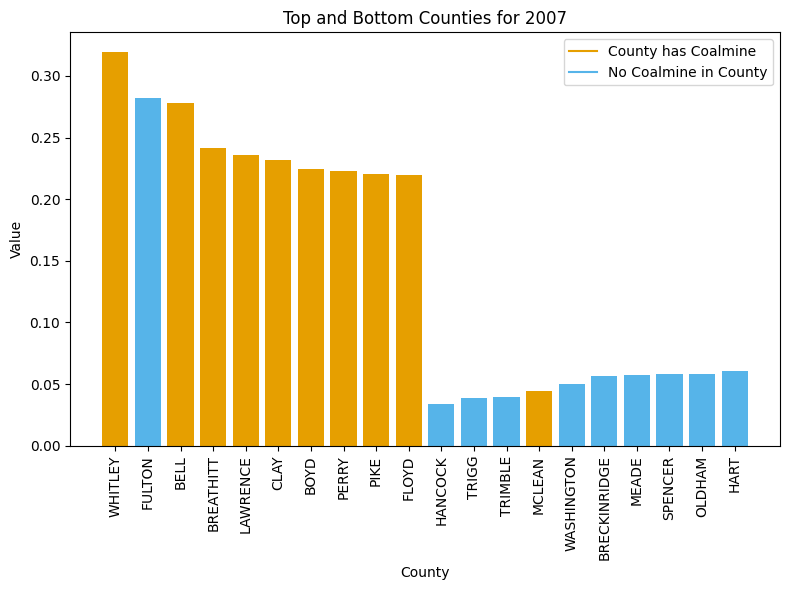

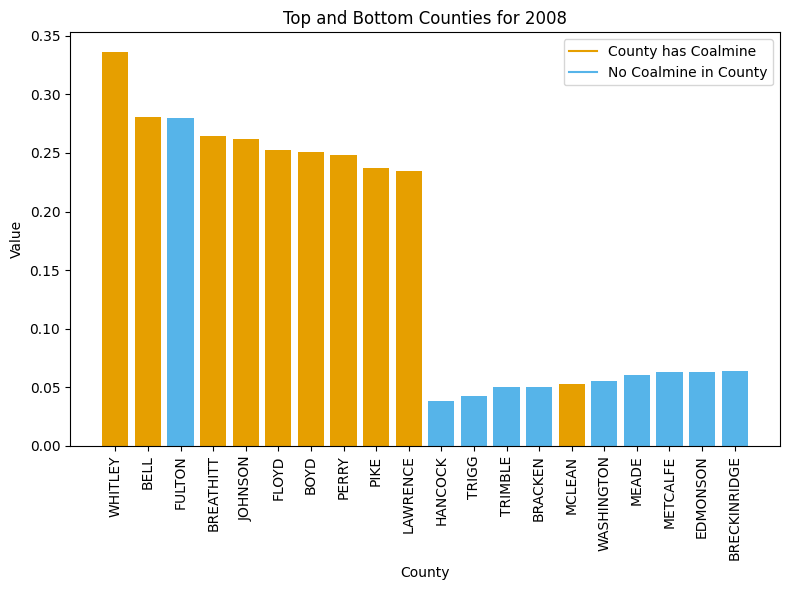

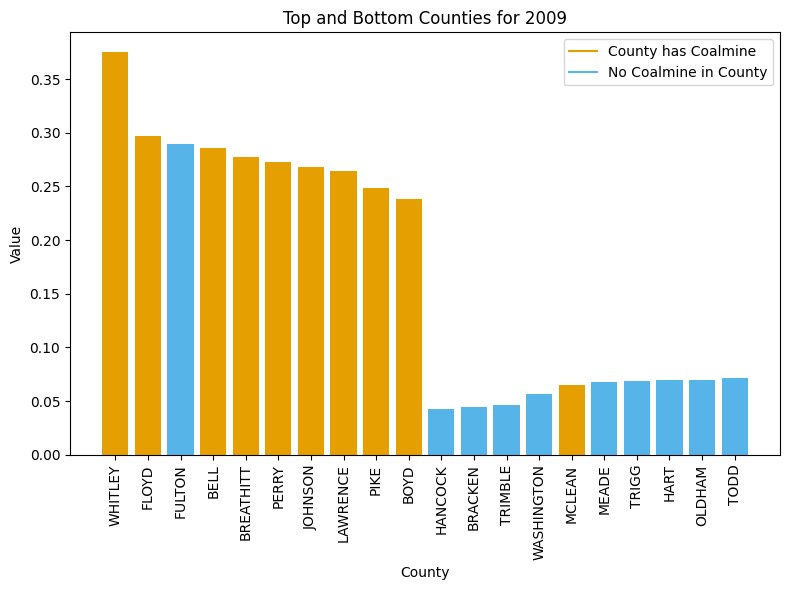

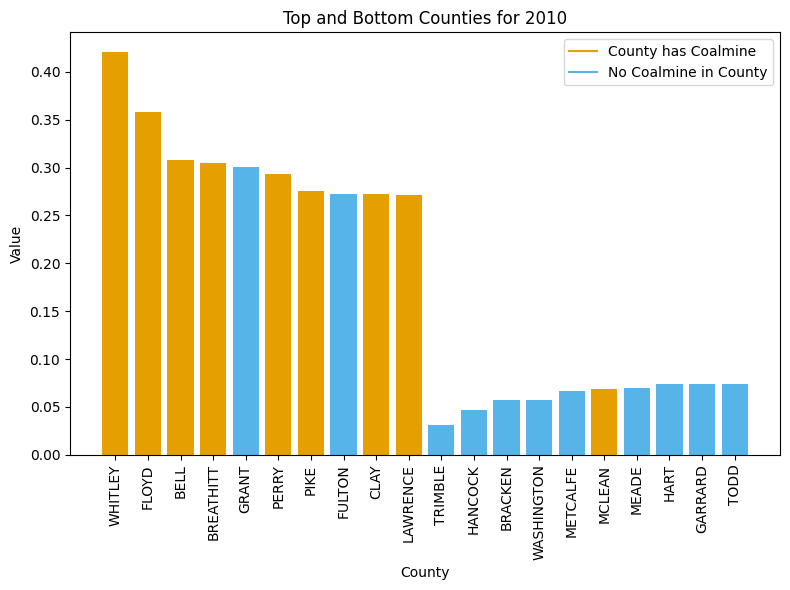

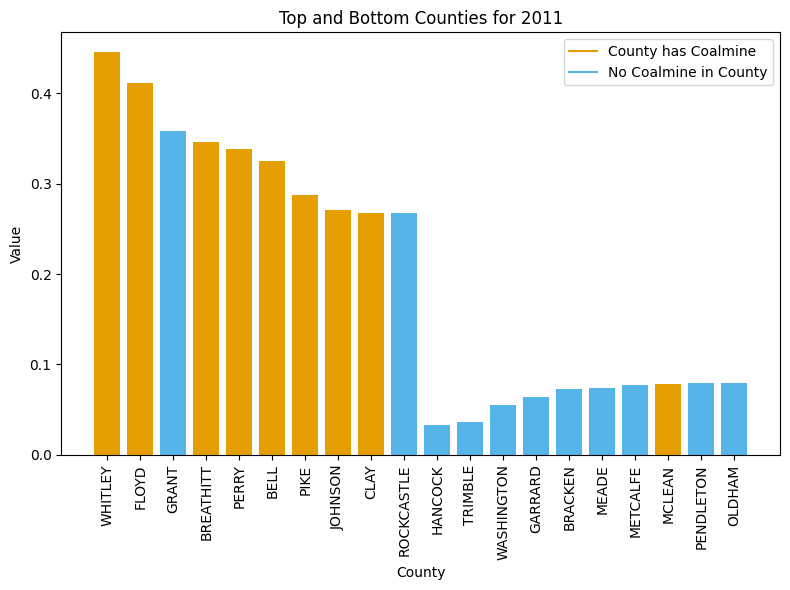

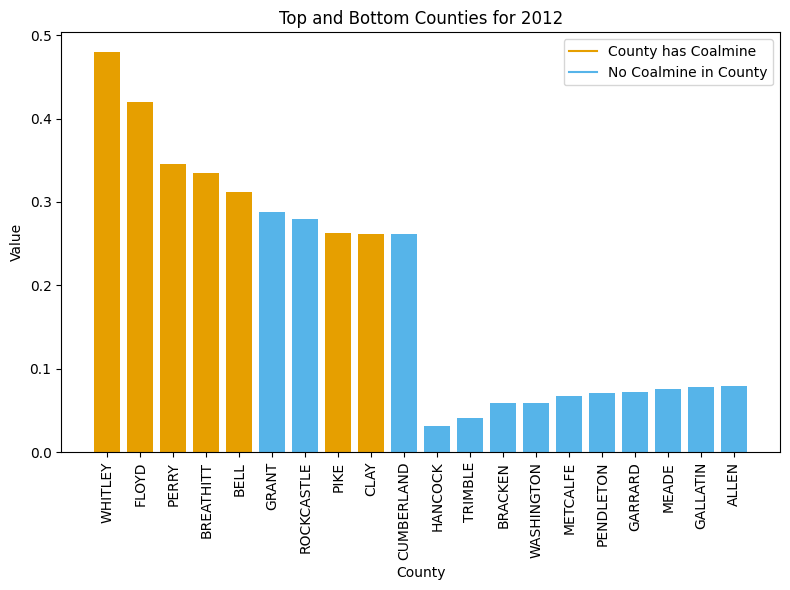

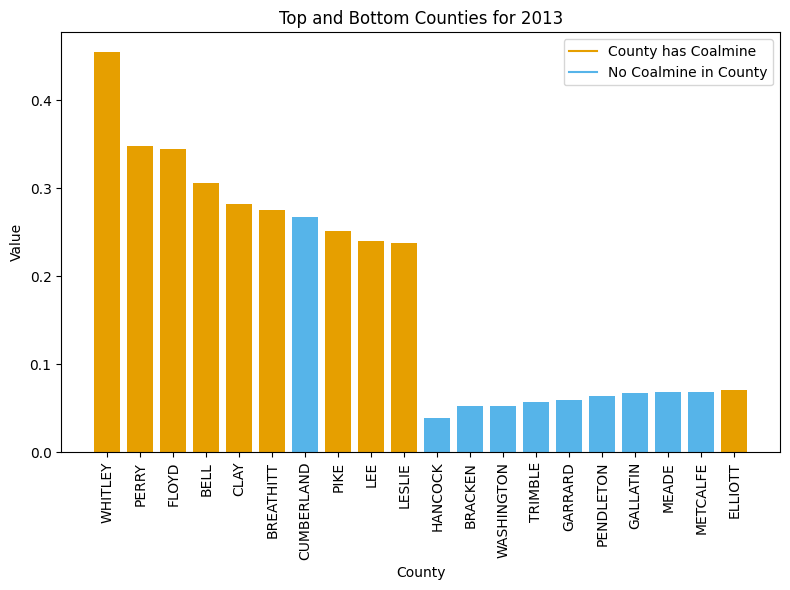

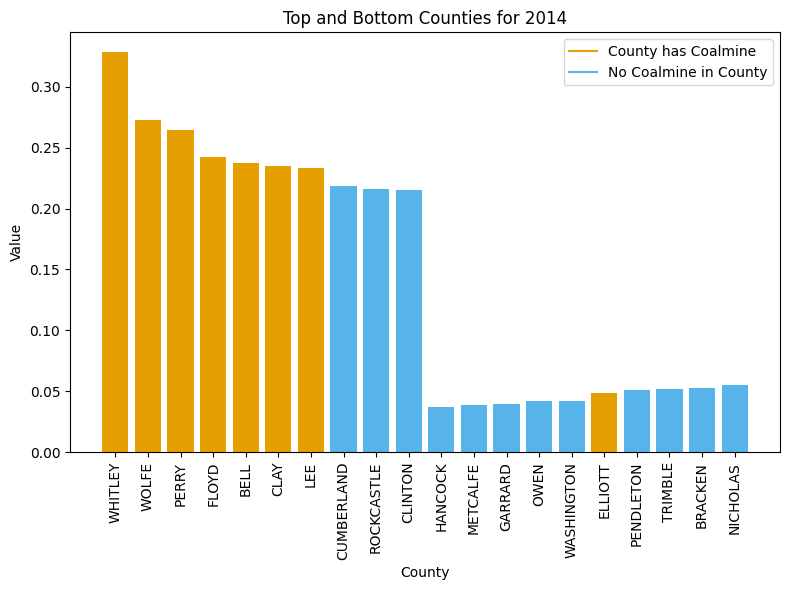

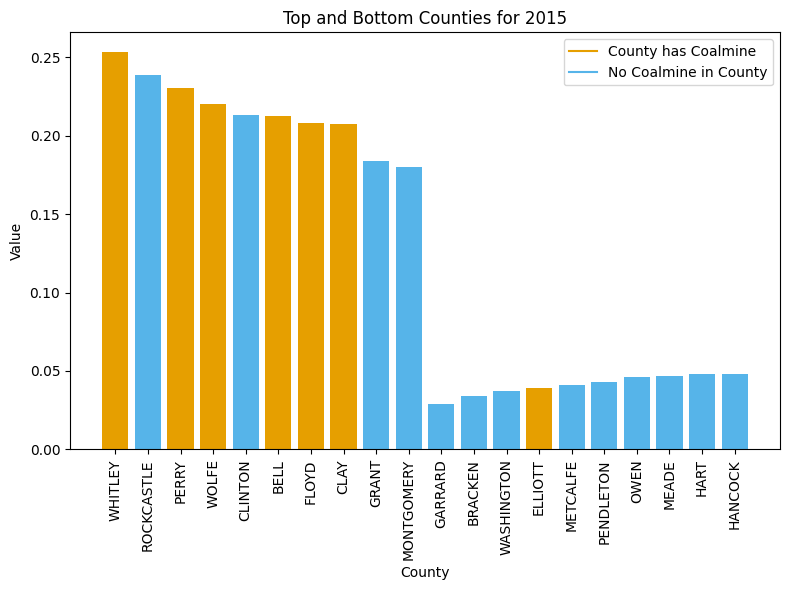

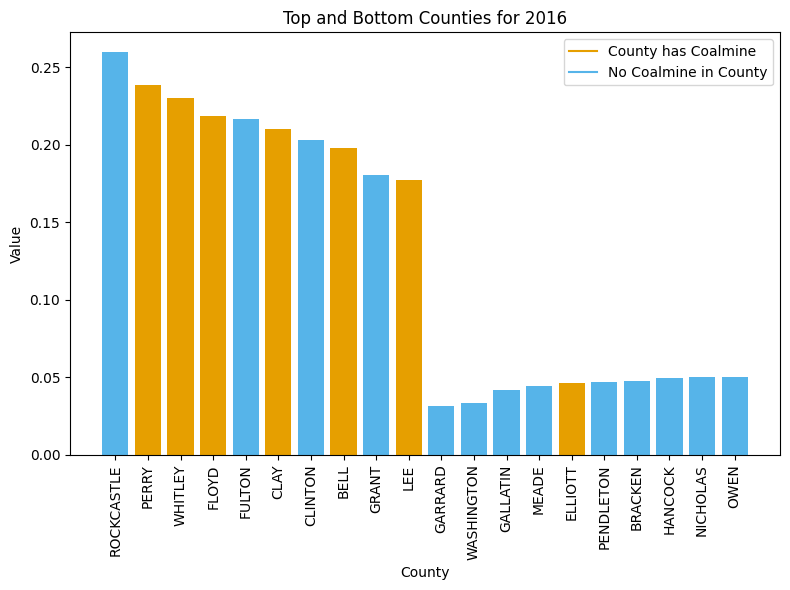

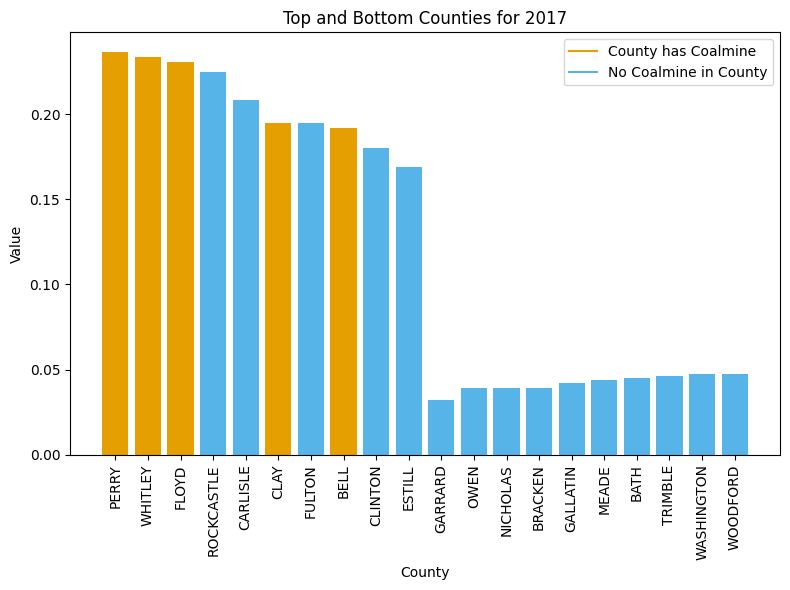

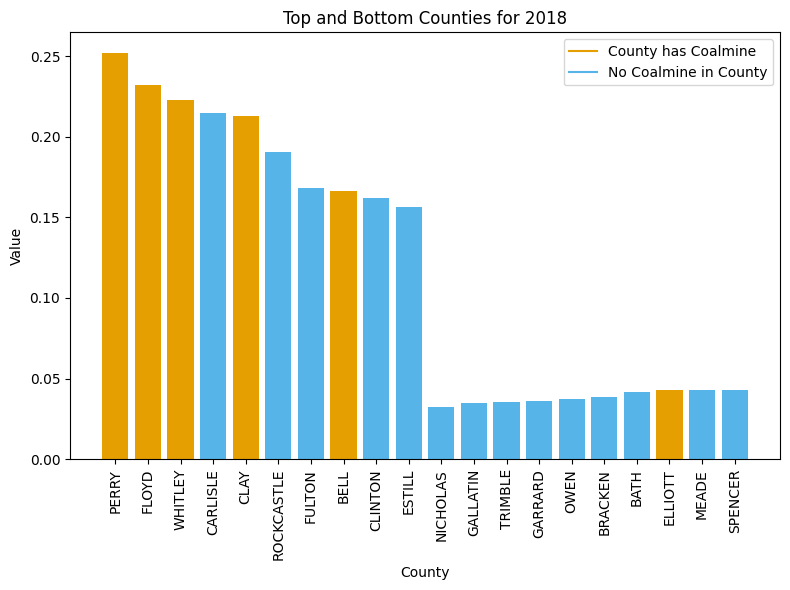

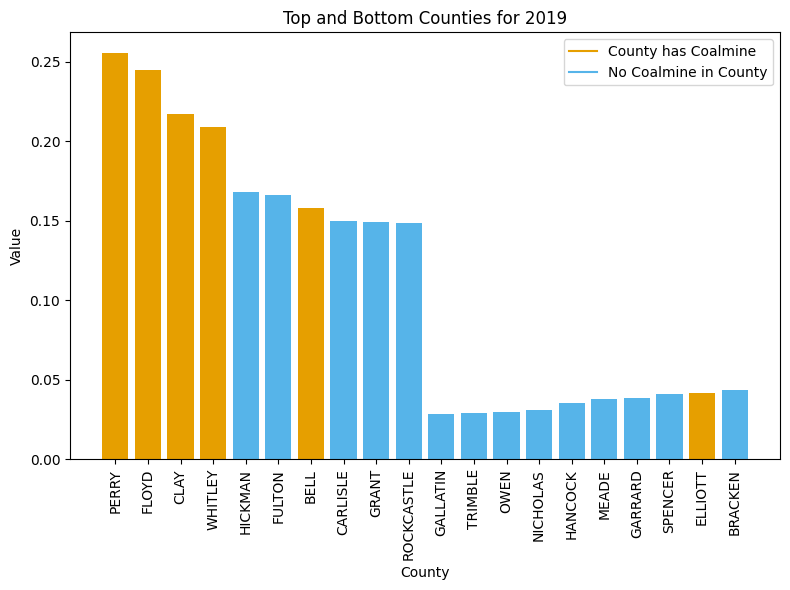

In [109]:

years = per_capita_df.loc[:, 2006:2019]
for year in years:
    top_counties = per_capita_df.nlargest(10, year)
    bottom_counties = per_capita_df.nsmallest(10, year)

    plt.figure(figsize=(8, 6))

 
    for county in top_counties.index:
        colour = COLOUR_YES if per_capita_df.loc[county, 'hasCoalMine'] == 'Yes' else COLOUR_NO
        plt.bar(county, per_capita_df.loc[county, year], color=colour, label='Top 10')

    for county in bottom_counties.index:
        colour = COLOUR_YES if per_capita_df.loc[county, 'hasCoalMine'] == 'Yes' else COLOUR_NO
        plt.bar(county, per_capita_df.loc[county, year], color=colour, label='Bottom 10')

    orange_patch = plt.Line2D([0], [0], color=COLOUR_YES, label='County has Coalmine')
    blue_patch = plt.Line2D([0], [0], color=COLOUR_NO, label='No Coalmine in County')
    plt.legend(handles=[orange_patch, blue_patch])

    plt.title(f'Top and Bottom Counties for {year}')
    plt.xlabel('County')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

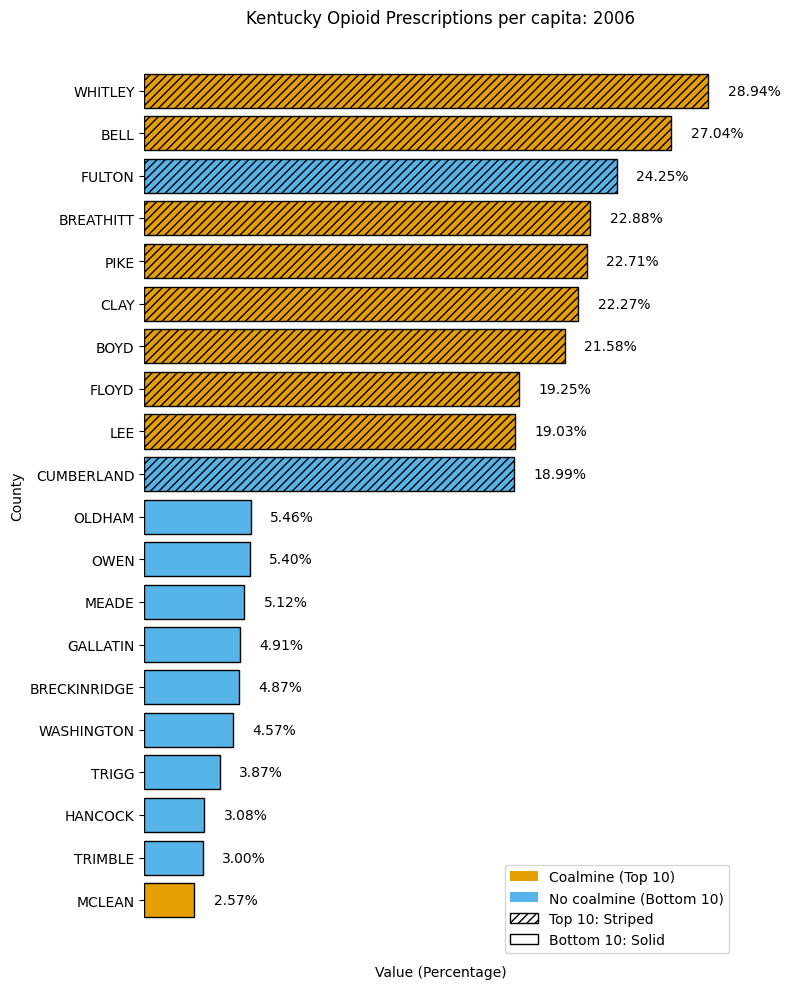

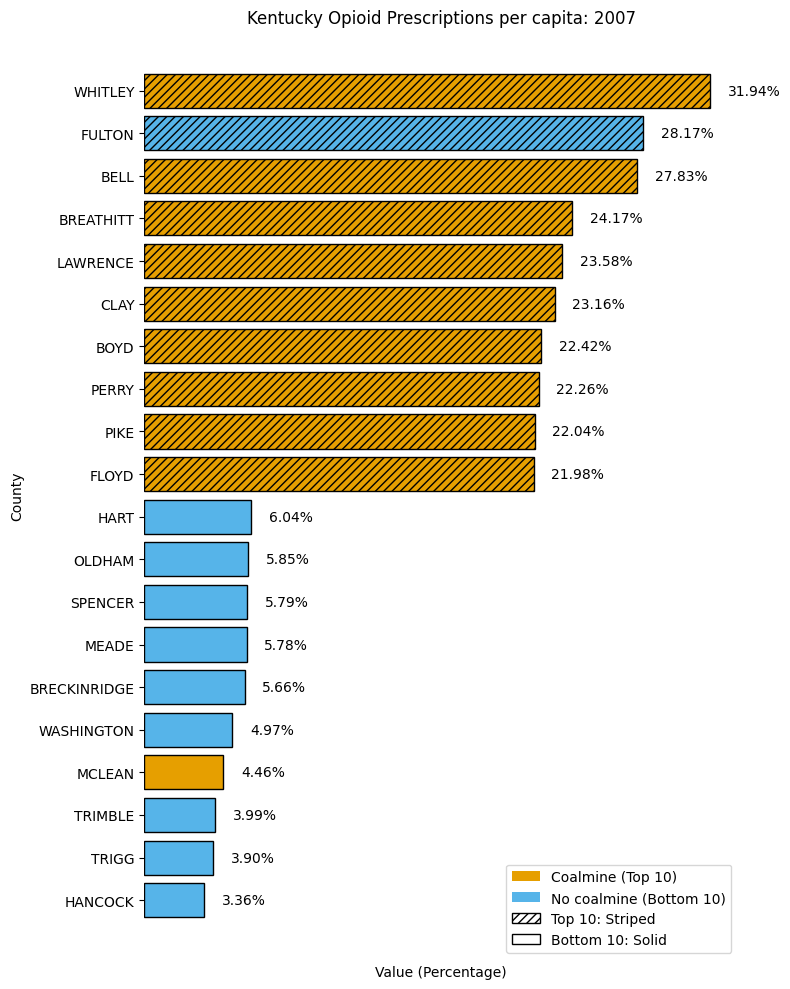

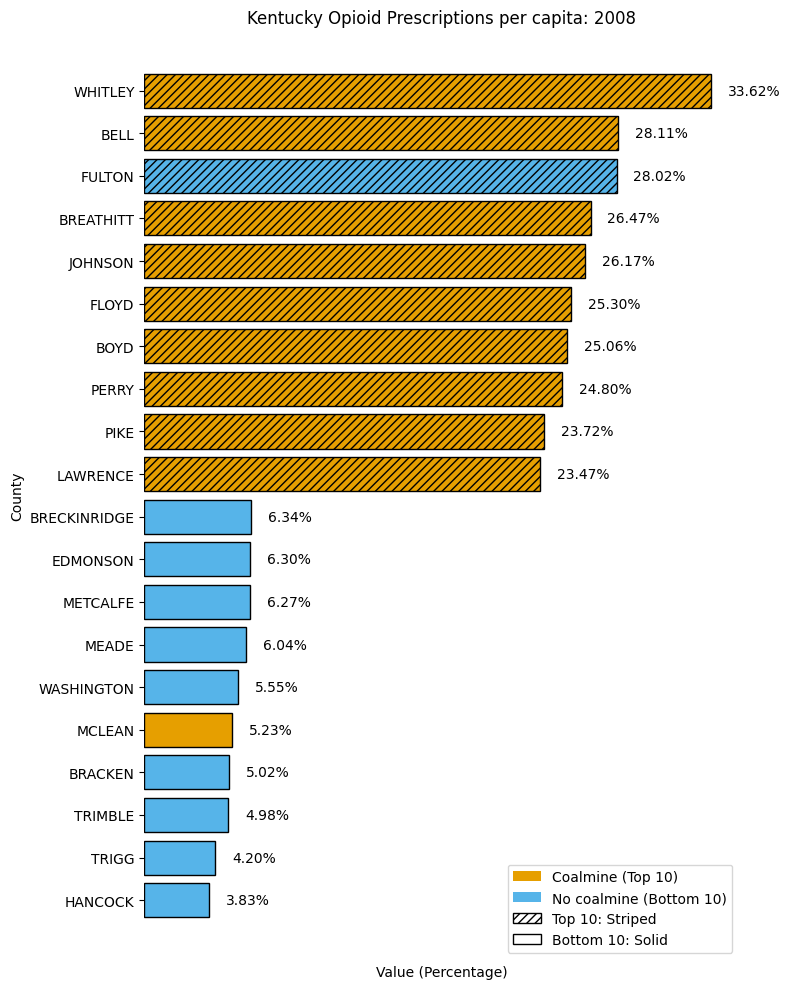

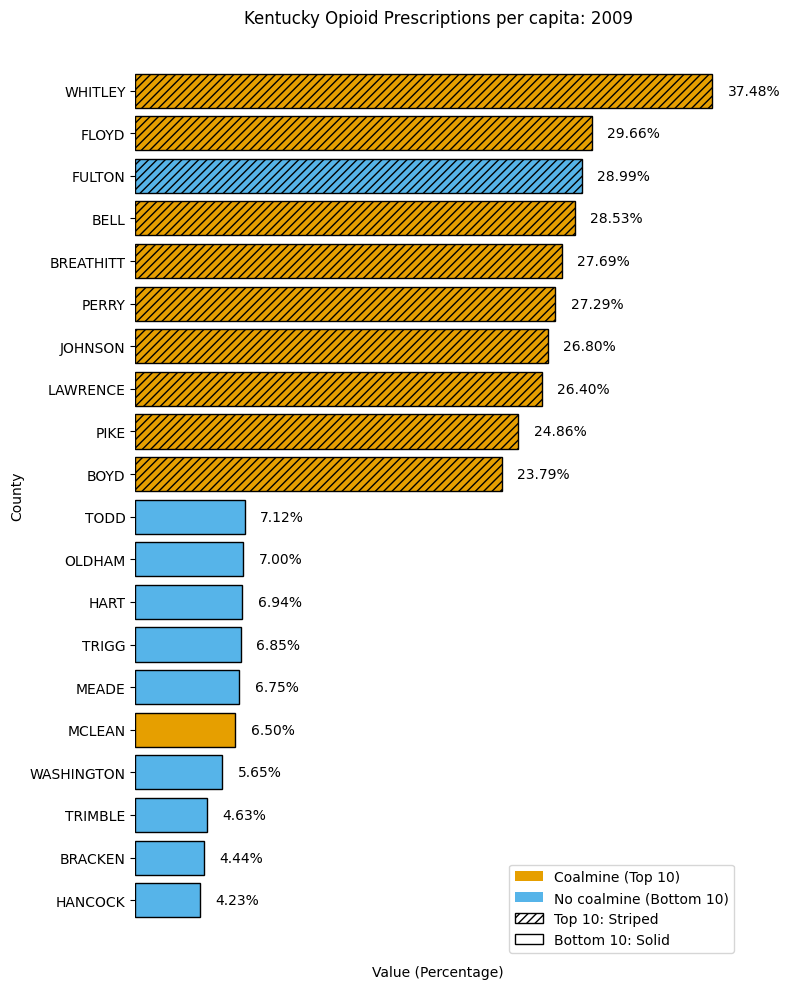

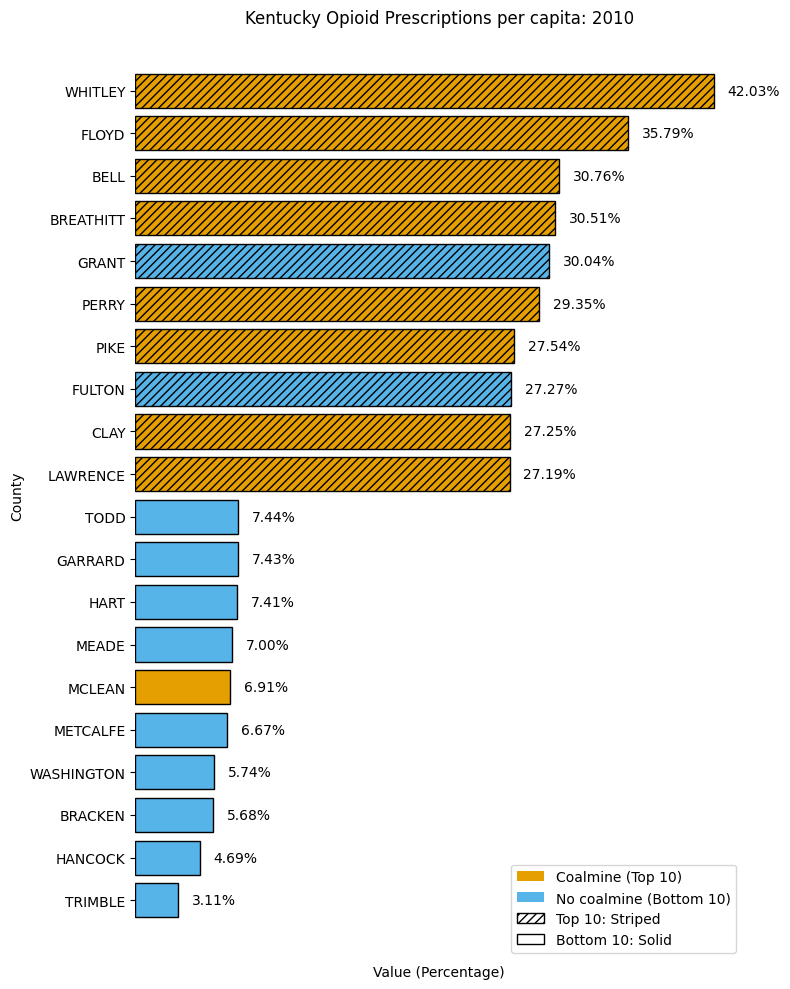

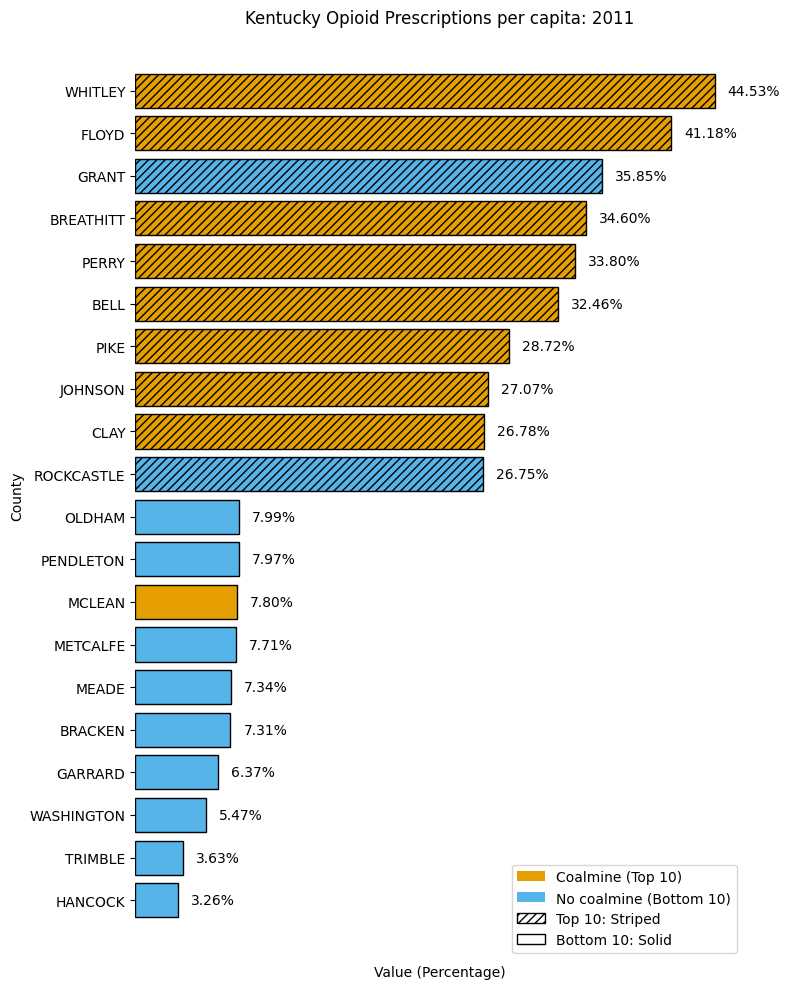

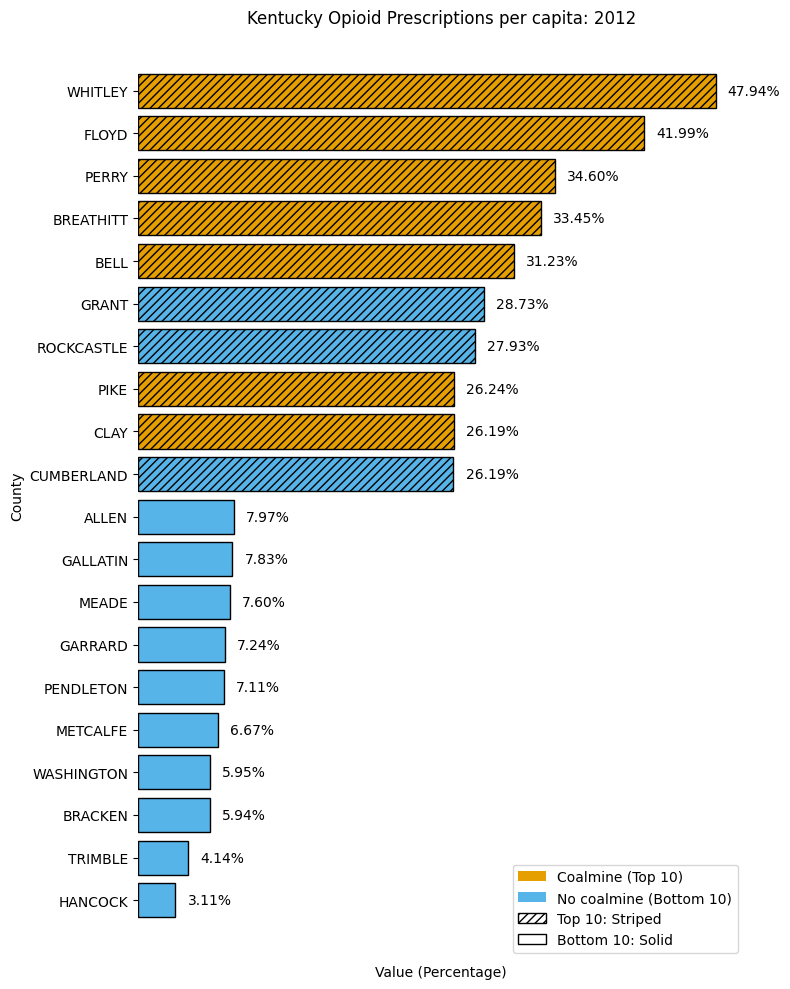

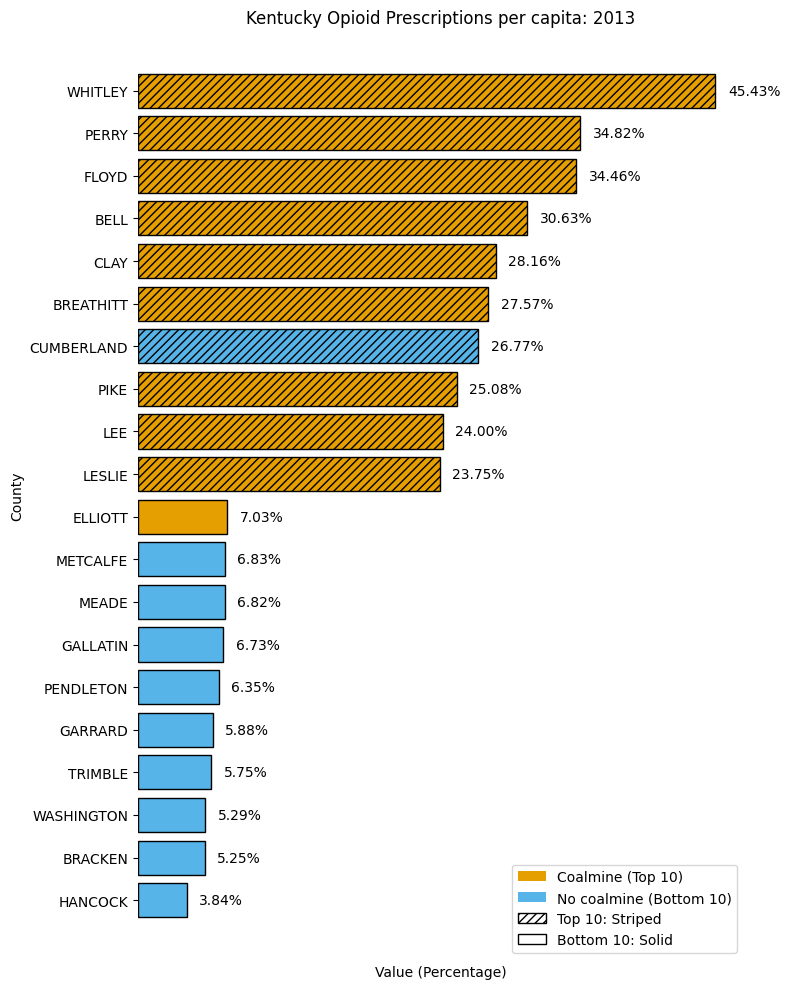

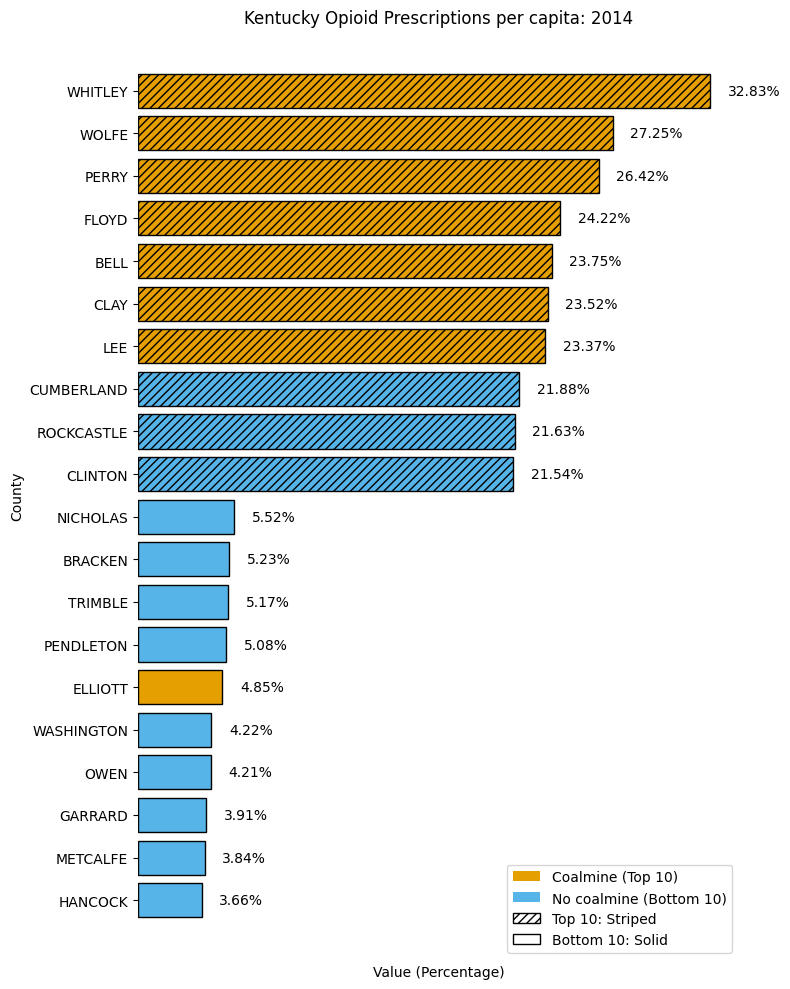

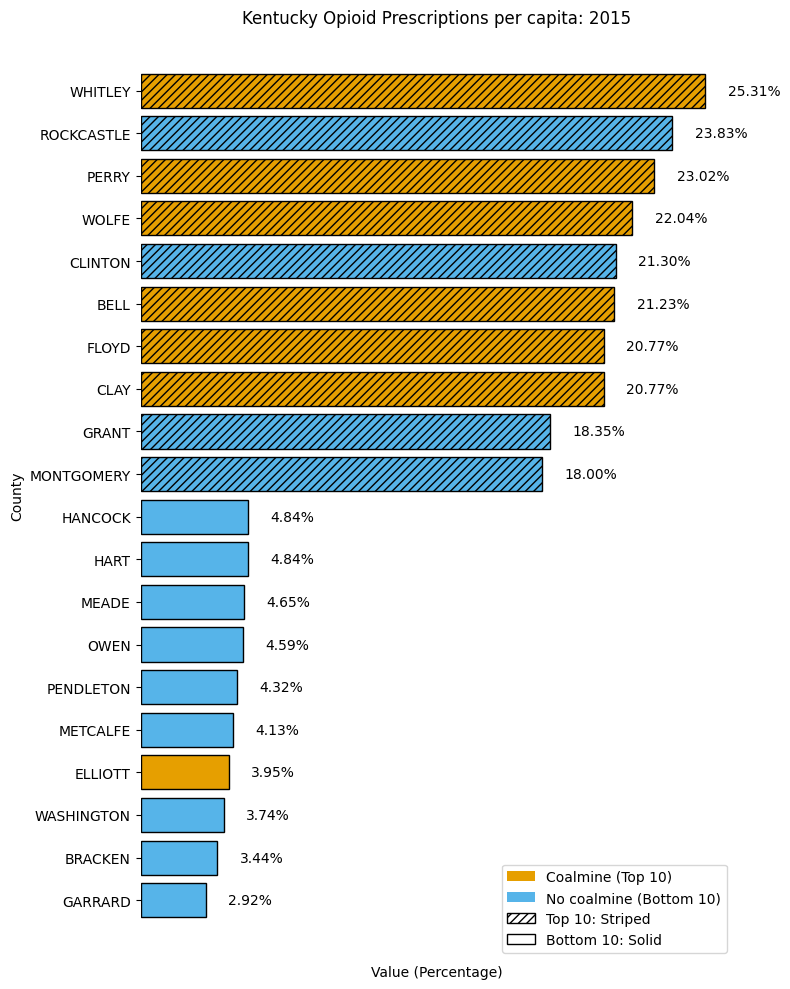

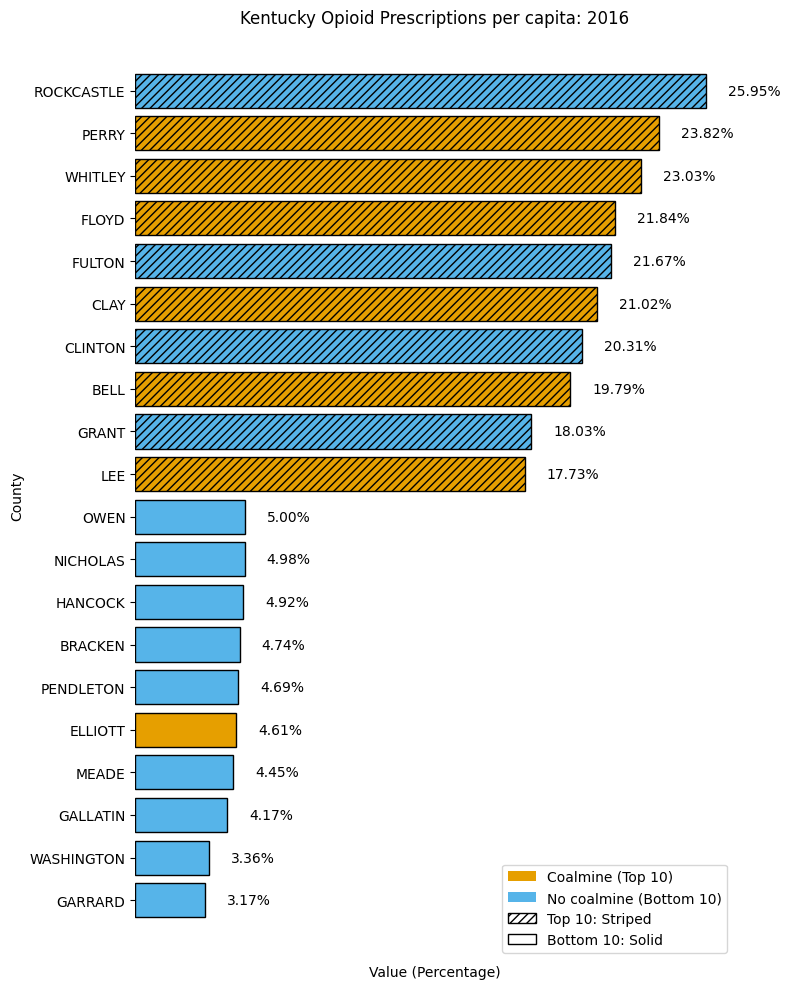

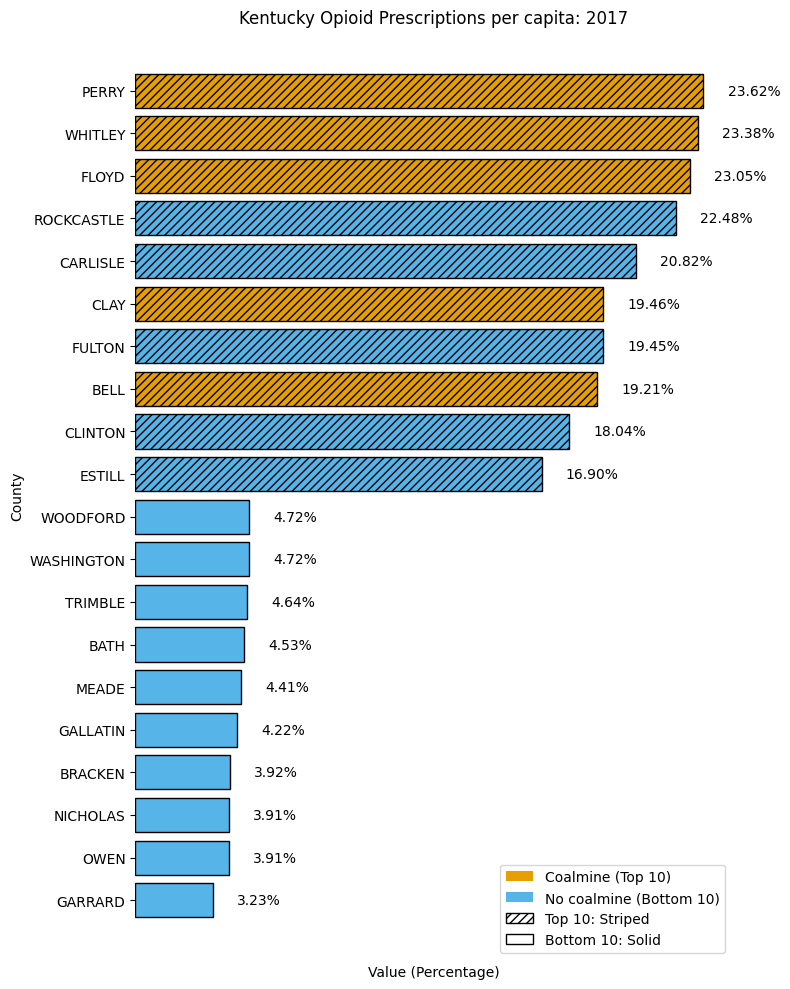

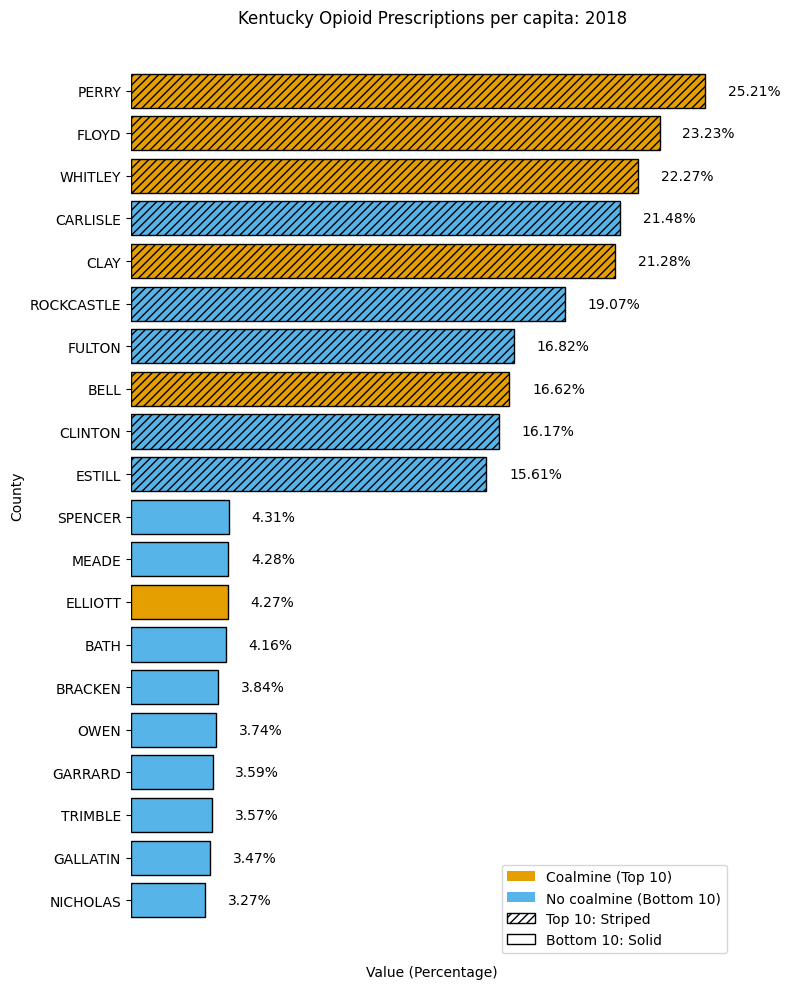

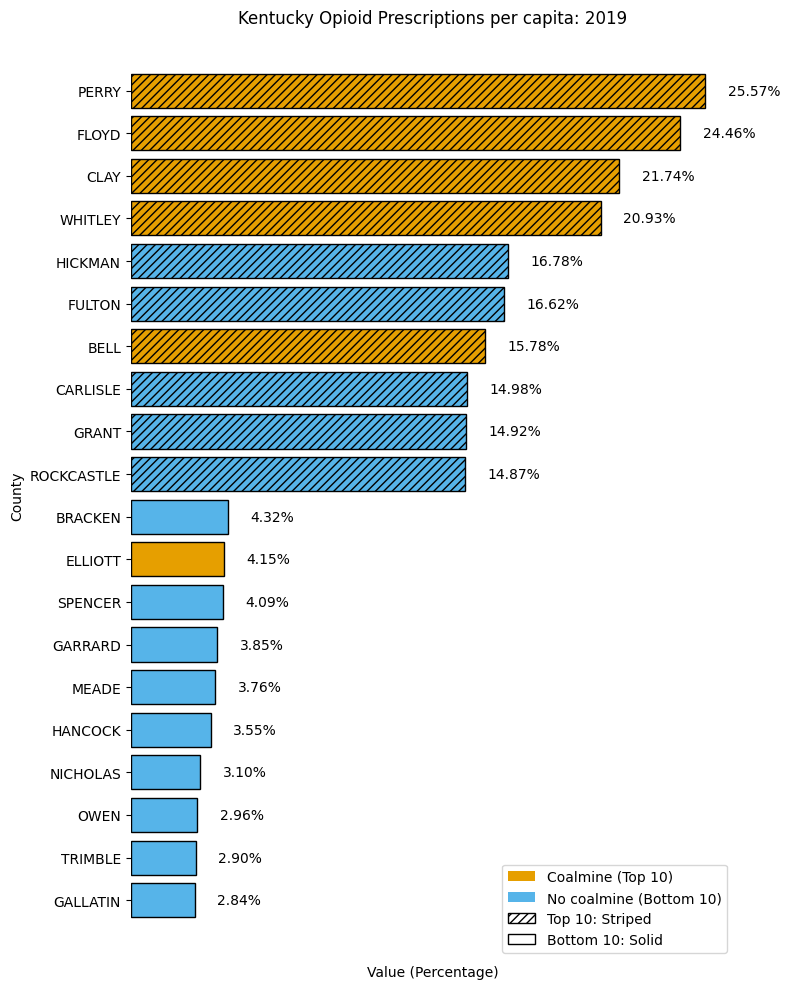

In [111]:
import matplotlib.patches as mpatches
years = per_capita_df.loc[:, 2006:2019]

for year in years:
    top_counties = per_capita_df.nlargest(10, year)  # Top 10 in ascending order
    bottom_counties = per_capita_df.nsmallest(10, year)[::-1]  # Bottom 10 in descending order

    plt.figure(figsize=(8, 10))  # Adjusted size for horizontal bar charts

    for county_set, label, hatch_style in [(top_counties, 'Top 10: Striped (Coalmine)', '////'),
                                           (bottom_counties, 'Bottom 10: Solid (No coalmine)', None)]:
        for county in county_set.index:
            colour = COLOUR_YES if per_capita_df.loc[county, 'hasCoalMine'] == 'Yes' else COLOUR_NO
            value = per_capita_df.loc[county, year] * 100  # Convert to percentage
            bar_label = f'{value:.2f}%'
            hatch = hatch_style if label.startswith('Top') else None

            plt.barh(county, value, color=colour, label=label, hatch=hatch, edgecolor='black')
            plt.text(value + 1, county, bar_label, va='center', ha='left', color='black') 

    plt.box(False)  
    plt.xticks([])  

    # Create a custom legend
    orange_patch = mpatches.Patch(facecolor=COLOUR_YES, label='Coalmine (Top 10)')
    blue_patch = mpatches.Patch(facecolor=COLOUR_NO, label='No coalmine (Bottom 10)')
    striped_patch = mpatches.Patch(facecolor='white', edgecolor='black', hatch='////', label='Top 10: Striped')
    solid_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Bottom 10: Solid')

    plt.legend(handles=[orange_patch, blue_patch, striped_patch, solid_patch], loc='lower right')

    plt.title(f'Kentucky Opioid Prescriptions per capita: {year}')
    plt.xlabel('Value (Percentage)')
    plt.ylabel('County')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

I Want to Consolidate all these graphs into one chart and add iteractivity

In [113]:
per_capita_df.reset_index(inplace=True)
per_capita_df.rename(columns={'index': 'CountyNames'}, inplace=True)
per_capita_df.head()


,CountyNames,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,hasCoalMine
0,ADAIR,0.087865,0.097550,0.114988,0.124192,0.144833,0.165218,0.160188,0.154518,0.113072,0.097537,0.101199,0.114637,0.107193,0.101239,No
1,ALLEN,0.071295,0.070676,0.083829,0.077936,0.077521,0.081136,0.079725,0.080725,0.066511,0.061955,0.071859,0.060613,0.049901,0.046305,No
2,ANDERSON,0.118573,0.139292,0.143921,0.144458,0.144624,0.160174,0.143173,0.114085,0.078837,0.070119,0.090127,0.088711,0.077514,0.076801,No
3,BALLARD,0.082033,0.086935,0.081791,0.104217,0.111286,0.108598,0.091491,0.071861,0.060332,0.058301,0.065498,0.054378,0.049925,0.056795,No
4,BARREN,0.137406,0.152794,0.156399,0.162766,0.187087,0.213700,0.214847,0.211286,0.140331,0.138497,0.165665,0.158277,0.146753,0.137856,No
